In [6]:
import pandas as pd
from pathlib import Path
import lightgbm as lgb

In [11]:
DATA_PATH = Path("../dataset")
COMP_DATA_PATH = Path("../data")
IMAGE_PATH = Path("../dataset")

VERSION = "v1.1"

TEST_SET = DATA_PATH / f"test_df_with_features_{VERSION}.csv"
TRAIN_SPLIT = DATA_PATH / f"train_df_with_features_{VERSION}.csv"
VAL_SPLIT = DATA_PATH / f"val_df_with_features_{VERSION}.csv"

In [12]:
train_features = pd.read_csv(TRAIN_SPLIT)
test_features = pd.read_csv(TEST_SET)
val_features = pd.read_csv(TRAIN_SPLIT)
train_features

,image_url1,image_url2,is_same,image_path1,image_path2,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,...,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_grayscale,right_grayscale,left_height,right_height,left_width,right_width
0,892325437.jpg,944751814.jpg,0,dataset/images_train/892325437.jpg,dataset/images_train/944751814.jpg,119,108,108,136,137,...,375,618,122,310.0,False,False,600,600,800,800
1,965225293.jpg,965564035.jpg,1,dataset/images_train/965225293.jpg,dataset/images_train/965564035.jpg,0,0,0,0,0,...,0,0,0,0.0,False,False,800,800,600,600
2,892403612.jpg,927225968.jpg,0,dataset/images_train/892403612.jpg,dataset/images_train/927225968.jpg,115,126,126,120,96,...,184,277,114,222.0,False,False,600,600,800,800
3,917878082.jpg,921610429.jpg,1,dataset/images_train/917878082.jpg,dataset/images_train/921610429.jpg,10,24,24,19,25,...,65,94,8,28.0,False,False,600,600,800,800
4,907769150.jpg,921819974.jpg,0,dataset/images_train/907769150.jpg,dataset/images_train/921819974.jpg,73,100,100,107,114,...,185,284,76,116.0,False,False,800,600,600,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72482,896077337.jpg,932363571.jpg,0,dataset/images_train/896077337.jpg,dataset/images_train/932363571.jpg,140,104,104,118,104,...,261,411,120,250.0,False,False,600,600,800,800
72483,919255125.jpg,922397616.jpg,0,dataset/images_train/919255125.jpg,dataset/images_train/922397616.jpg,96,108,108,117,103,...,238,360,106,222.0,False,False,600,563,800,1000
72484,924310310.jpg,925806417.jpg,1,dataset/images_train/924310310.jpg,dataset/images_train/925806417.jpg,4,0,0,3,0,...,17,14,0,2.0,False,False,600,600,800,800
72485,927655303.jpg,931435054.jpg,1,dataset/images_train/927655303.jpg,dataset/images_train/931435054.jpg,2,8,8,4,6,...,153,247,0,98.0,False,False,800,800,600,600


In [13]:
train_features_cleaned = train_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
test_features_cleaned = test_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
val_features_cleaned = val_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
train_features_cleaned

,is_same,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_grayscale,right_grayscale,left_height,right_height,left_width,right_width
0,0,119,108,108,136,137,80,172,375,618,122,310.0,False,False,600,600,800,800
1,1,0,0,0,0,0,0,0,0,0,0,0.0,False,False,800,800,600,600
2,0,115,126,126,120,96,59,97,184,277,114,222.0,False,False,600,600,800,800
3,1,10,24,24,19,25,15,31,65,94,8,28.0,False,False,600,600,800,800
4,0,73,100,100,107,114,51,93,185,284,76,116.0,False,False,800,600,600,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72482,0,140,104,104,118,104,55,122,261,411,120,250.0,False,False,600,600,800,800
72483,0,96,108,108,117,103,73,116,238,360,106,222.0,False,False,600,563,800,1000
72484,1,4,0,0,3,0,19,19,17,14,0,2.0,False,False,600,600,800,800
72485,1,2,8,8,4,6,30,60,153,247,0,98.0,False,False,800,800,600,600


In [14]:
from sklearn.metrics import f1_score
import numpy as np

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning:

'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 23113, number of negative: 49374
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2799
[LightGBM] [Info] Number of data points in the train set: 72487, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.318857 -> initscore=-0.759029
[LightGBM] [Info] Start training from score -0.759029
[1]	train's binary_logloss: 0.531992	train's f1: 0	val's binary_logloss: 0.531992	val's f1: 0
[2]	train's binary_logloss: 0.459221	train's f1: 0	val's binary_logloss: 0.459221	val's f1: 0
[3]	train's binary_logloss: 0.400398	train's f1: 0.992815	val's binary_logloss: 0.400398	val's f1: 0.992815
[4]	train's binary_logloss: 0.35158	train's f1: 0.995092	val's binary_logloss: 0.35158	val's f1: 0.995092
[5]	train's binary_logloss: 0.310384	train's f1: 0.995682	val's binary_logloss: 0.310384	val's f1: 0.

<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='f1'>

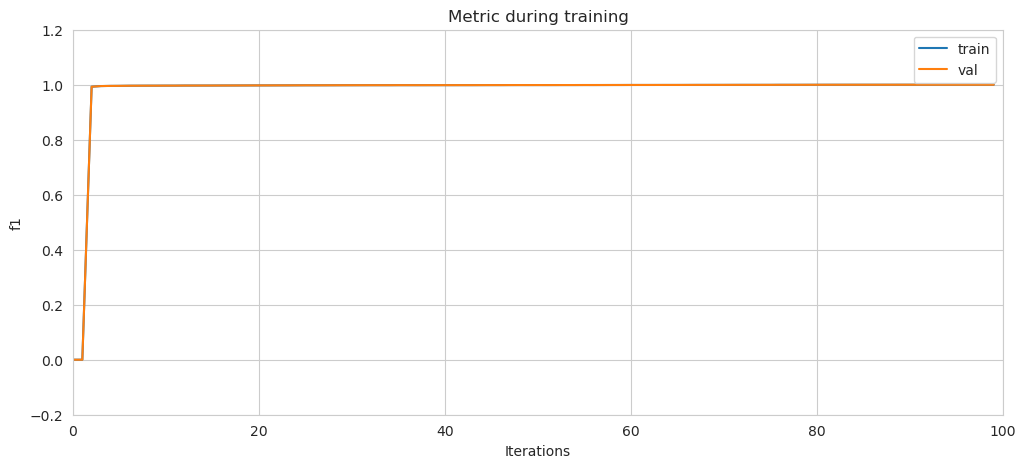

In [15]:
param = {
    'metric': [],
    'objective': 'binary'
}

train_lgbm = lgb.Dataset(train_features_cleaned.drop(["is_same"], axis=1), 
                         label=train_features_cleaned["is_same"])

val_lgbm = lgb.Dataset(val_features_cleaned.drop(["is_same"], axis=1), 
                         label=val_features_cleaned["is_same"])

evals_result = {}

clf = lgb.train(param, train_lgbm, valid_sets=[val_lgbm, train_lgbm], valid_names=['val', 'train'], feval=lgb_f1_score, evals_result=evals_result)

lgb.plot_metric(evals_result, metric='f1')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

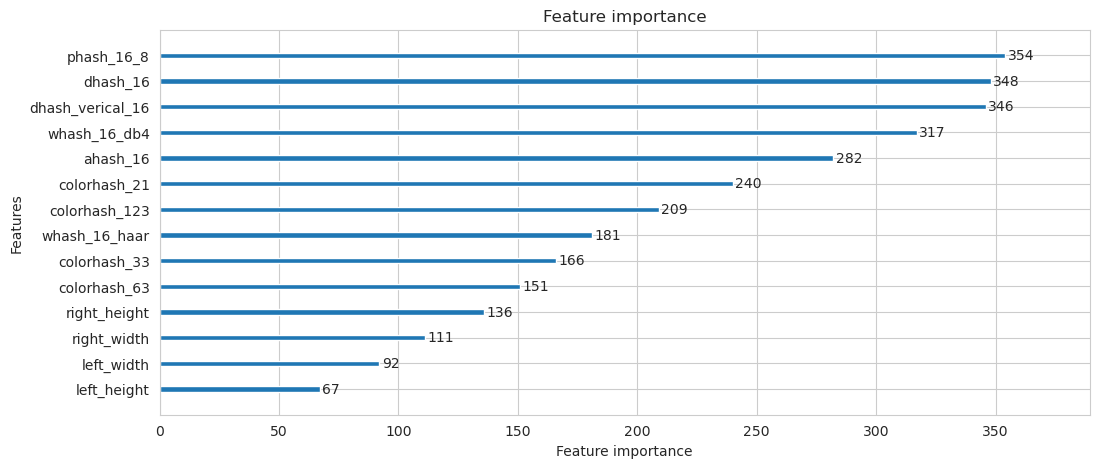

In [16]:
lgb.plot_importance(clf)

In [25]:
import json
with open('../models/basic_lgbm.json', 'w', encoding='utf-8') as f:
    json.dump(clf.dump_model(), f, ensure_ascii=False, indent=4)

In [9]:
test_features_cleaned

,ID,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_height,right_height,left_width,right_width
0,2,126.0,116.0,116.0,129.0,103.0,77.0,121.0,235.0,361.0,130.0,286.0,800.0,600.0,600.0,800.0
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,99.0,112.0,112.0,97.0,137.0,66.0,99.0,175.0,265.0,110.0,158.0,699.0,600.0,525.0,800.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,800.0,600.0,600.0
4,6,105.0,100.0,100.0,76.0,100.0,67.0,96.0,191.0,288.0,106.0,204.0,700.0,600.0,933.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22655,22657,104.0,110.0,110.0,115.0,123.0,117.0,190.0,359.0,546.0,104.0,176.0,800.0,800.0,600.0,600.0
22656,22658,117.0,128.0,128.0,115.0,124.0,120.0,236.0,490.0,766.0,118.0,258.0,600.0,800.0,800.0,600.0
22657,22659,179.0,110.0,110.0,128.0,129.0,64.0,100.0,188.0,285.0,168.0,340.0,700.0,600.0,933.0,800.0
22658,22660,95.0,118.0,118.0,116.0,114.0,88.0,109.0,173.0,237.0,106.0,176.0,700.0,698.0,525.0,393.0


In [26]:
is_same = pd.Series(clf.predict(test_features_cleaned.drop(["ID"], axis=1)))
submission = pd.DataFrame({
    "ID": test_features_cleaned["ID"],
    "is_same": is_same
})

In [27]:
submission["is_same"] = (submission["is_same"] > 0.5).astype(int)
submission

,ID,is_same
0,2,0
1,3,0
2,4,0
3,5,1
4,6,0
...,...,...
22655,22657,0
22656,22658,0
22657,22659,0
22658,22660,0


In [28]:
submission.to_csv("boosting_baseline.csv", index=False)

In [24]:
!sudo chown -R jovyan ..